# 🤖 Agents (joint)

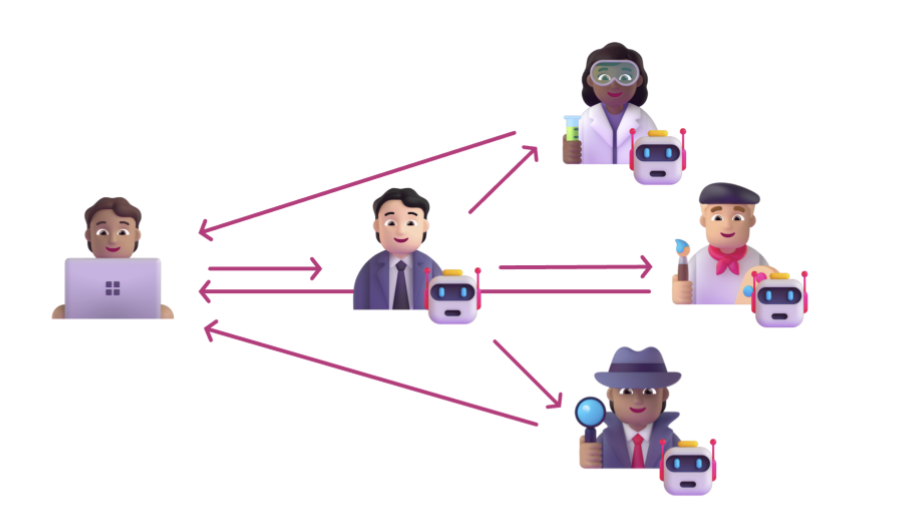

### Initialize the kernel

In [ ]:
#r "nuget: Microsoft.SemanticKernel, 1.14.1"
#r "nuget: Microsoft.SemanticKernel.Plugins.Core, 1.14.1-alpha"
#r "nuget: Microsoft.SemanticKernel.Plugins.Web, 1.14.1-alpha"
#r "nuget: Microsoft.SemanticKernel.Experimental.Agents, 1.14.1-alpha"

#!import Secrets.cs

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Experimental.Agents;
using Microsoft.SemanticKernel.Experimental.Agents.Exceptions;

### 🔌 Create a plugin from native functions in alerts class. We plan to attach it to some agents below.

In [ ]:
#!import Plugins/AlertsPlugin.cs

var newsPlugin = KernelPluginFactory.CreateFromType<AlertsPlugin>();

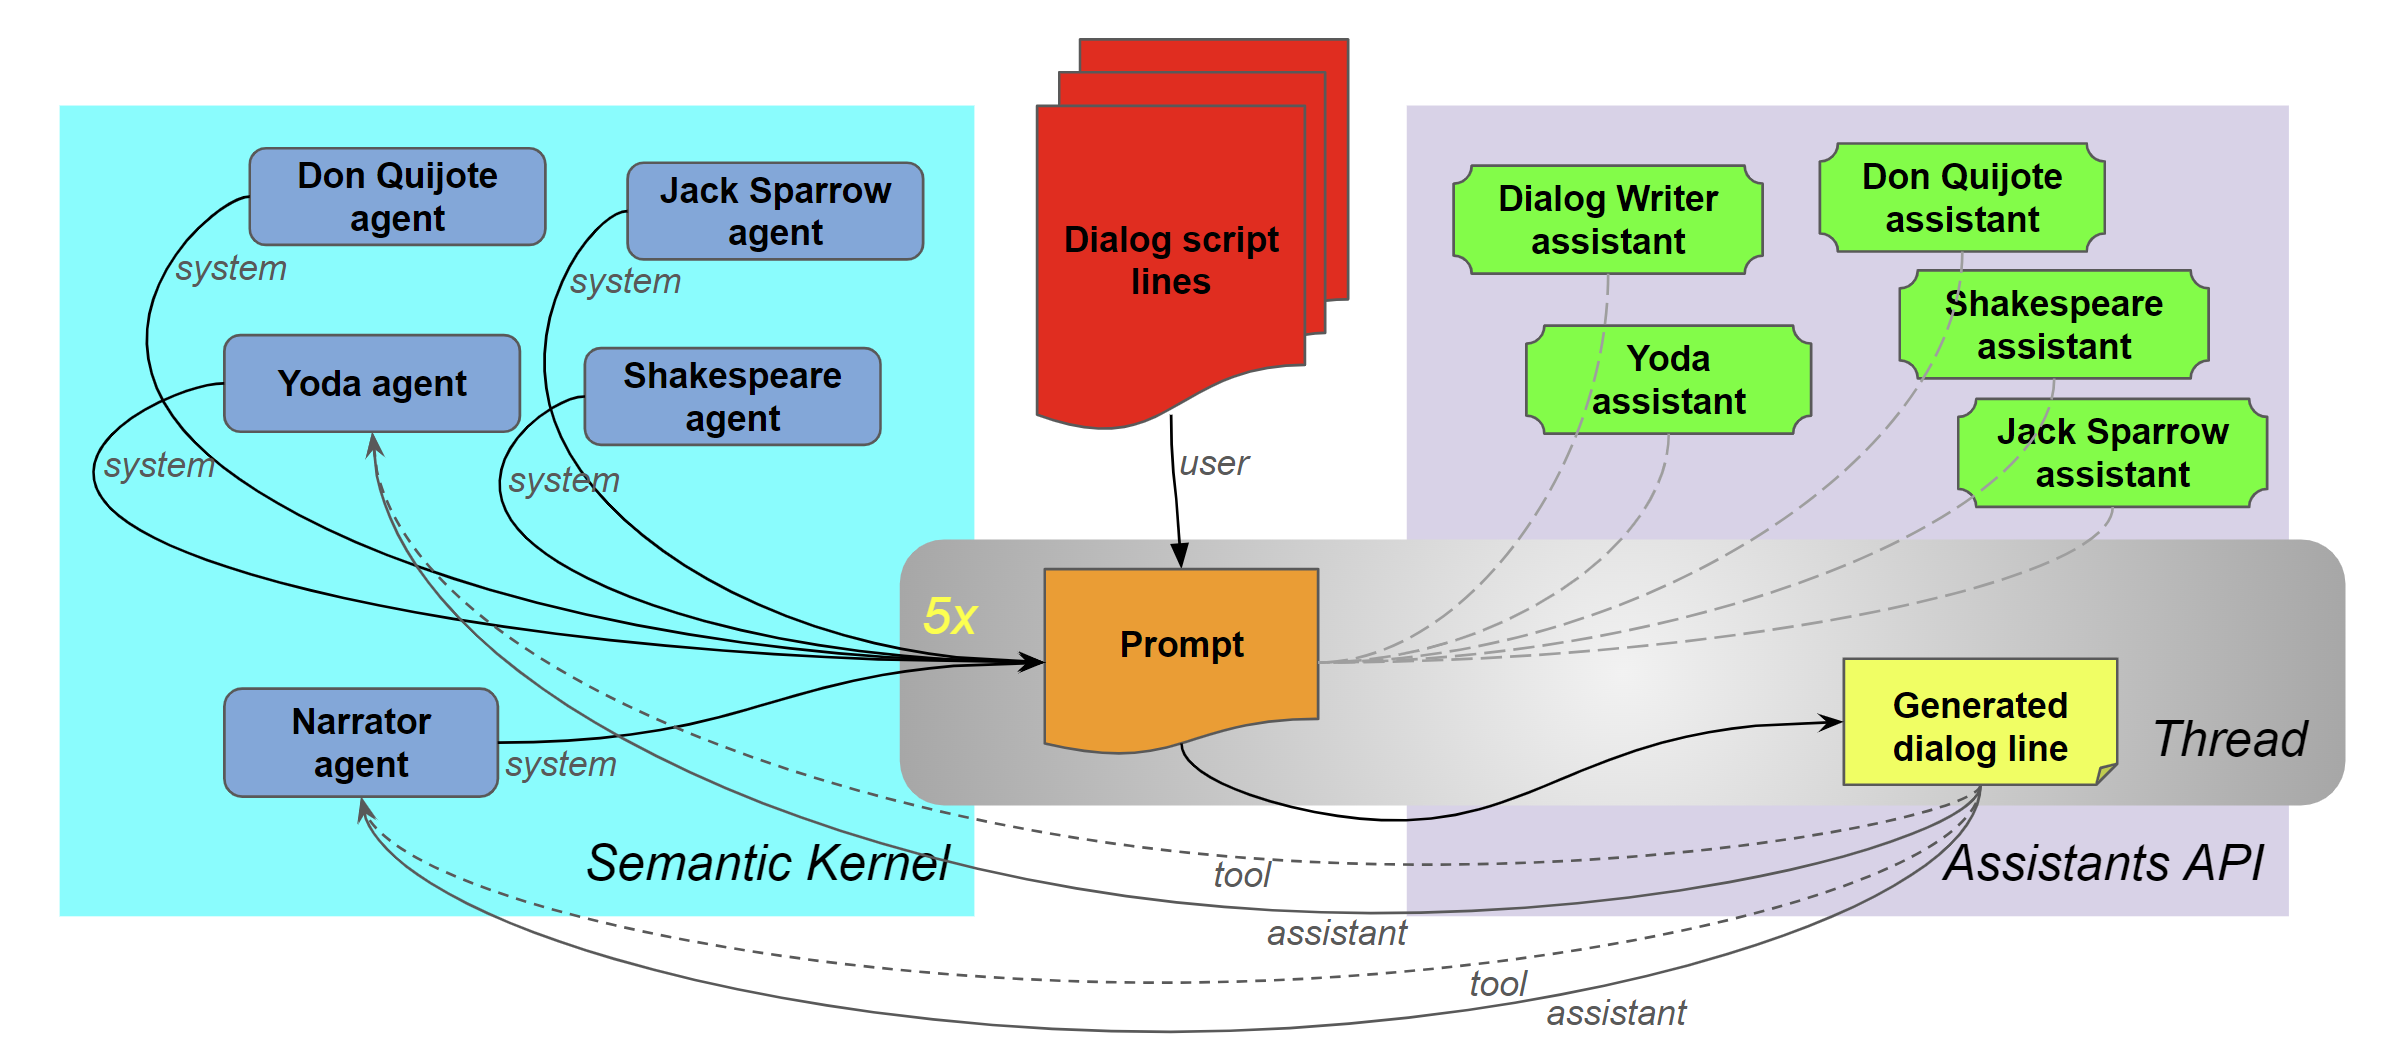

In [ ]:
string[] scriptSteps = 
[
    "Jack Sparrow, Shakespeare, Don Quijote, and Yoda are having a feast. Don Quijote likes coca-cola! All making remarks about their favorite drinks.",
    "Jack Sparrow makes a bad joke about Don Quijote's taste in drinks.",
    "Yoda hurts Jack Sparrow with an energy blast, resulting in an epic victory.",
    "Jack Sparrow dies and Don Quijote falls down to his knees weeping for Jack Sparrow.",
    "Shakespeare, Yoda or Don Quijote responds with 'VICTORY!'"
];

### 🤖 Define agents

### Joint agents collaboration with interraction (for loop)

In [ ]:
#pragma warning disable SKEXP0101

var jackAgent = await new AgentBuilder()
    .WithAzureOpenAIChatCompletion(
        model: Secrets.DeploymentName,
        endpoint: Secrets.Endpoint,
        apiKey: Secrets.ApyKey)
    .FromTemplatePath(@"Agents/JointAgents.JackSparrowDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync();

var yodaAgent = await new AgentBuilder()
    .WithAzureOpenAIChatCompletion(
        model: Secrets.DeploymentName,
        endpoint: Secrets.Endpoint,
        apiKey: Secrets.ApyKey)
    .FromTemplatePath(@"Agents/JointAgents.YodaDialogAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync();

var narratorAgent = await new AgentBuilder()
    .WithAzureOpenAIChatCompletion(
        model: Secrets.DeploymentName,
        endpoint: Secrets.Endpoint,
        apiKey: Secrets.ApyKey)
    .FromTemplatePath(@"Agents/JointAgents.NarratorAgent.yaml")
    .BuildAsync();

### 🧵 Start a thread in order to open a chat session

In [ ]:
#pragma warning disable SKEXP0101

var thread = await narratorAgent.NewThreadAsync();

### 💬 Start chatting (for loop)...

In [ ]:
#pragma warning disable SKEXP0101

foreach (var scriptStep in scriptSteps)
{
    var messageUser = await thread.AddUserMessageAsync(scriptStep);
    Console.ForegroundColor = ConsoleColor.DarkGray;
    Console.WriteLine($"[SCRIPT: {messageUser.Content}]");
    Console.ResetColor();

    var jackAgentMessages = await thread.InvokeAsync(jackAgent).ToArrayAsync();
    foreach (var message in jackAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Yellow;
        Console.Write("    Jack Sparrow: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
    }

    var yodaAgentMessages = await thread.InvokeAsync(yodaAgent).ToArrayAsync();
    foreach (var message in yodaAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Blue;
        Console.Write("    Yoda: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
    }

    var narratorMessages = await thread.InvokeAsync(narratorAgent).ToArrayAsync();
    foreach (var message in narratorMessages)
    {
        Console.ForegroundColor = ConsoleColor.Gray;
        Console.Write("    Narrator: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
    }
}

### Joint agents collaboration with interraction (do while loop)

In [ ]:
#pragma warning disable SKEXP0101

var moderatorAgent = await new AgentBuilder()
    .WithAzureOpenAIChatCompletion(
        model: Secrets.DeploymentName,
        endpoint: Secrets.Endpoint,
        apiKey: Secrets.ApyKey)
    .FromTemplatePath(@"Agents/JointAgents.ModeratorAgent.yaml")
    .WithPlugin(newsPlugin)
    .BuildAsync();

### 🧵 Start another thread in order to open a new chat session

In [ ]:
#pragma warning disable SKEXP0101

var thread = await moderatorAgent.NewThreadAsync();

### 💬 Start chatting (do while loop)...

In [ ]:
#pragma warning disable SKEXP0101

var initialMessage = """
    Jack Sparrow, Shakespeare, Don Quijote, and Yoda are starting a debate about the best drink in the world.
    Each of them is trying to convince the others for the prefered drink.
    Soon some of them are getting convinced and they are starting to support the new drink.
    """;

var messageUser = await thread.AddUserMessageAsync(initialMessage);
Console.ForegroundColor = ConsoleColor.DarkGray;
Console.WriteLine($"[SCRIPT: {messageUser.Content}]");
Console.ResetColor();
var shouldContinue = true;
do
{
    var jackAgentMessages = await thread.InvokeAsync(jackAgent).ToArrayAsync();
    foreach (var message in jackAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Yellow;
        Console.Write("    Jack Sparrow: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
    }

    var yodaAgentMessages = await thread.InvokeAsync(yodaAgent).ToArrayAsync();
    foreach (var message in yodaAgentMessages)
    {
        Console.ForegroundColor = ConsoleColor.Blue;
        Console.Write("    Yoda: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
    }

    var moderatorMessages = await thread.InvokeAsync(moderatorAgent).ToArrayAsync();
    foreach (var message in moderatorMessages)
    {
        Console.ForegroundColor = ConsoleColor.Gray;
        Console.Write("    Moderator: ");
        var lines = message.Content.Split('\n', '.', StringSplitOptions.RemoveEmptyEntries);
        foreach (var line in lines)
        {
            Console.WriteLine($"{line}");
        }
        Console.ResetColor();
        if (!string.IsNullOrWhiteSpace(message.Content) && message.Content.Contains("CHEERS", StringComparison.OrdinalIgnoreCase))
        {
            shouldContinue = false;
        }
    }
}
while (shouldContinue);

### 🧹 Clean up thread and agents

In [ ]:
#pragma warning disable SKEXP0101

await thread.DeleteAsync();
await jackAgent.DeleteAsync();
await yodaAgent.DeleteAsync();
await narratorAgent.DeleteAsync();
await moderatorAgent.DeleteAsync();